In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from io import StringIO

In [2]:
times = {'deepsets' : 0.002286,
         'pointnet' : 0.045003,
         'pointnet++' : 0.086201,
         'sonet' : 0.200043,
         'kcnet' : 0.065254,
         'dgcnn' : 0.299180,
         'pointcnn' : 0.100051}

params = {'deepsets' : 810536,
          'pointnet' : 3480049,
          'pointnet++' : 1475688,
          'sonet' : 2666985,
          'kcnet' : 882368,
          'dgcnn' : 1836081,
          'pointcnn' : 1198680}


In [3]:
data = pd.DataFrame(columns=['times', 'params'], index = times.keys())
data['times'] = times.values()
data['params'] = params.values()

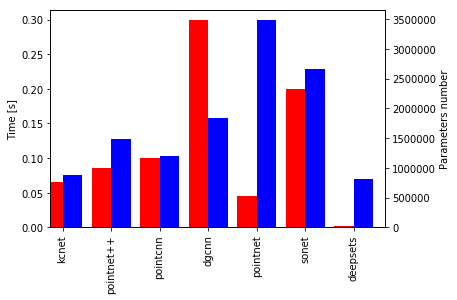

In [4]:
fig = plt.figure() 
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

data.times.plot(kind='bar', color='red', ax=ax, width=width, position=1)
data.params.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

ax.set_ylabel('Time [s]')
ax2.set_ylabel('Parameters number')

plt.xticks(range(len(data)),(data.index), rotation=30)
plt.savefig('inference.png')
plt.show()

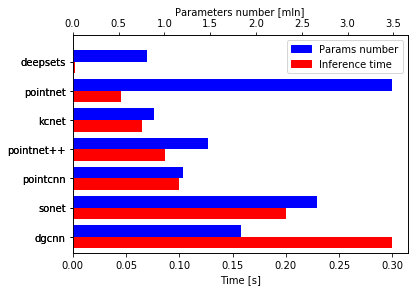

In [12]:
# Sort by descending times
data = data.sort_values(by='times', ascending=False)

fig = plt.figure() 
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twiny() # Create another axes that shares the same x-axis as ax.

width = 0.4

data.times.plot(kind='barh', color='red', ax=ax, width=width, position=1)
data.params.plot(kind='barh', color='blue', ax=ax2, width=width, position=0)

ax.set_xlabel('Time [s]')
ax2.set_xlabel('Parameters number [mln]')

new_ticks = ["%.1f" % (x/1e6) for x in ax2.get_xticks()]
ax2.set_xticklabels(new_ticks)

# Manual legend
import matplotlib.patches as mpatches
green_patch = mpatches.Patch(color='blue', label='Params number')
red_patch = mpatches.Patch(color='red', label='Inference time')
plt.legend(handles = [green_patch, red_patch], loc=1)

x1,x2,y1,y2 = plt.axis()
plt.axis((x1, x2, y1 - 0.3, y2+0.25))
plt.savefig('inference_horizontal.png')
plt.show()